# Catchment analysis for quantifying how NbS reduce river flood risk

### Step 0: Import packages to work with, set up folder pathways and project to Jamaica's grid coordinates

In [4]:
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
base_path = Path("/Users/robynhaggis/Documents/Geospatial_analysis/Inputs")
output_path = Path("/Users/robynhaggis/Documents/Geospatial_analysis/Processed_data")
jamaica_metric_grid_crs = "EPSG:3448"

### Step 1: Read in hydrobasins file, then read in Jamaica boundary and clip hydrobasins to Jamaica

In [6]:
# Path to HydroBASINS Level 12 data

original_hydrobasins_path = base_path / "Hydrobasins_12/hybas_na_lev12_v1c.shp" 

In [7]:
original_hydrobasins = gpd.read_file(original_hydrobasins_path)

In [8]:
#print(f"Number of unique HYBAS_ID values: {unique_hybas_ids_original}")
unique_hybas_ids_unclipped = original_hydrobasins['HYBAS_ID'].nunique()
print(f"Number of unique HYBAS_ID values: {unique_hybas_ids_unclipped}")

Number of unique HYBAS_ID values: 122251


In [9]:
jamaica_boundary_path = base_path / "Boundaries/jamaica.gpkg"
jamaica_boundary = gpd.read_file(jamaica_boundary_path)
print(jamaica_boundary.crs)

EPSG:3448


In [10]:
# Reproject HydroBASINS to match Jamaica's CRS if necessary
reprojected_hydrobasins = original_hydrobasins.to_crs(jamaica_boundary.crs)
print(original_hydrobasins.crs)
print(reprojected_hydrobasins.crs)

EPSG:4326
EPSG:3448


<Axes: >

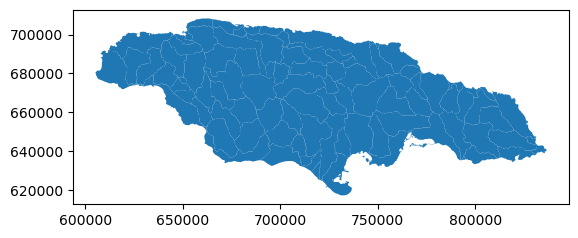

In [11]:
hydrobasins_clipped = gpd.clip(reprojected_hydrobasins, jamaica_boundary)
hydrobasins_clipped.plot()

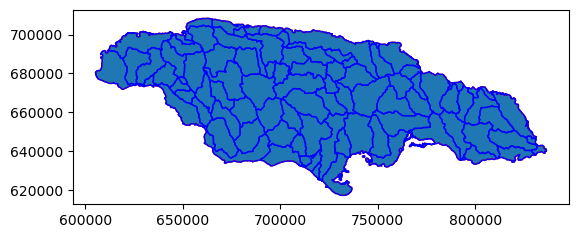

In [12]:
ax = jamaica_boundary.plot(edgecolor='red')
hydrobasins_clipped.plot(ax=ax, facecolor='none', edgecolor='blue')
plt.show()

In [13]:
# Check that the hydrobasins and Jamaica boundary are on the right coordinate system and that they are bounded the same (Jamaica bounds)
print("Hydrobasins_clipped CRS:", hydrobasins_clipped.crs)
print("Jamaica Boundary CRS:", jamaica_boundary.crs)

print("Hydrobasins_clipped bounds:", hydrobasins_clipped.total_bounds)
print("Jamaica boundary bounds:", jamaica_boundary.total_bounds)

Hydrobasins_clipped CRS: EPSG:3448
Jamaica Boundary CRS: EPSG:3448
Hydrobasins_clipped bounds: [605203.12192308 617438.6167982  836547.01749869 708274.25105478]
Jamaica boundary bounds: [605203.12192308 617438.6167982  836547.01749869 708274.25105478]


In [14]:
# Save the clipped layer to a new shapefile

# Define the output shapefile path

output_shapefile = output_path / "HydroBASINS_Level12_Clipped_Jamaica.shp"
hydrobasins_clipped.to_file(output_shapefile)


In [15]:
# Read the saved shapefile into a GeoDataFrame
hydrobasins_clipped_saved = gpd.read_file(output_shapefile)


In [16]:
# Count the unique values in the 'HYBAS_ID' column to check how many rows there should be
unique_hybas_ids_original = hydrobasins_clipped_saved['HYBAS_ID'].nunique()

# Print the result
print(f"Number of unique HYBAS_ID values: {unique_hybas_ids_original}")

Number of unique HYBAS_ID values: 103


In [17]:
# Display (nik) the first few rows to confirm it's loaded correctly
display(hydrobasins_clipped_saved.head())

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,7120065340,0,7120065340,7120065340,0.0,0.0,2.3,2.4,763000150300,0,1,0,109792,"POLYGON ((661703.492 651127.999, 661700.648 65..."
1,7120065350,0,7120065350,7120065350,0.0,0.0,75.1,918.5,763000161000,0,0,1,109793,"POLYGON ((662104.201 652890.578, 661317.377 65..."
2,7120065360,0,7120065360,7120065360,0.0,0.0,185.0,185.0,763000171100,0,1,0,109800,"POLYGON ((660399.782 652513.371, 660394.329 65..."
3,7120085300,0,7120085300,7120085300,0.0,0.0,47.9,47.9,763000170010,2,0,1,121835,"POLYGON ((651855.550 665042.064, 651488.737 66..."
4,7120852670,7120065350,7120065350,7120065350,8.3,8.3,104.3,104.3,763000162000,0,0,2,109795,"POLYGON ((664200.239 659473.736, 663193.149 66..."


In [18]:
print("hydrobasins_clipped_saved CRS:", hydrobasins_clipped.crs)
print("hydrobasins_clipped_saved bounds:", hydrobasins_clipped.total_bounds)

hydrobasins_clipped_saved CRS: EPSG:3448
hydrobasins_clipped_saved bounds: [605203.12192308 617438.6167982  836547.01749869 708274.25105478]


/var/folders/x6/l70lvh3n02zd5hydyxdh1l0h0000gn/T/ipykernel_93357/1029740074.py:4: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/var/folders/x6/l70lvh3n02zd5hydyxdh1l0h0000gn/T/ipykernel_93357/1029740074.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


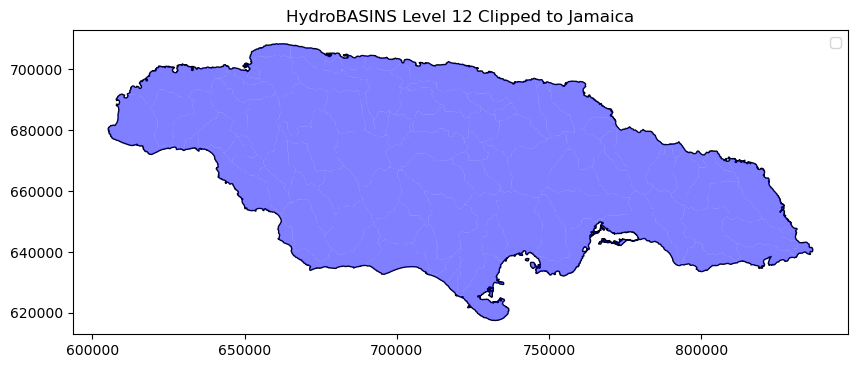

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
jamaica_boundary.plot(ax=ax, color='none', edgecolor='black', linewidth=1, label='Jamaica Boundary')
hydrobasins_clipped_saved.plot(ax=ax, color='blue', alpha=0.5, label='HydroBASINS Level 12')
plt.legend()
plt.title("HydroBASINS Level 12 Clipped to Jamaica")
plt.show()

### Step 2: Read in land use for Jamaica and intersect it with the clipped and re-projected hydrobasins file

EPSG:3448


<Axes: >

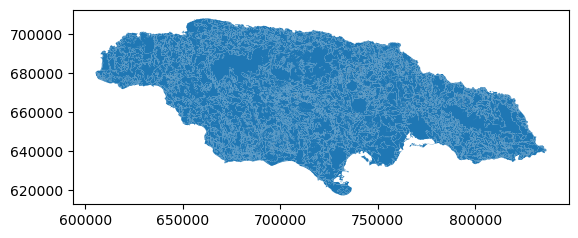

In [20]:
land_use = gpd.read_file(base_path / "2013_landuse_LandCover.shp")
print(land_use.crs)
land_use.plot()

In [21]:
land_use_hydrobasins_intersection = gpd.overlay(land_use, hydrobasins_clipped_saved, how='intersection')

In [22]:
land_use_hydrobasins_intersection.head()

,OBJECTID,Classify,Hectares,Shape_Leng,LU_CODE,Shape_Le_1,Shape_Area,Area new,HYBAS_ID,NEXT_DOWN,...,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,1,Bare Rock,0.219042,217.030317,BR,217.030317,2190.423461,2190.423,7120065310,0,...,0.0,0.0,144.2,144.2,763000150110,0,1,0,109789,"POLYGON ((695837.234 632593.591, 695828.883 63..."
1,3,Bare Rock,0.653918,363.027264,BR,363.027264,6539.178784,6539.179,7120065310,0,...,0.0,0.0,144.2,144.2,763000150110,0,1,0,109789,"POLYGON ((696323.914 632816.384, 696373.714 63..."
2,4,Bare Rock,1.518056,661.429856,BR,661.429856,15180.560352,15180.560,7120065310,0,...,0.0,0.0,144.2,144.2,763000150110,0,1,0,109789,"POLYGON ((694310.476 633240.981, 694327.859 63..."
3,11,Bare Rock,0.584123,424.359656,BR,424.359656,5841.232834,5841.233,7120065320,0,...,0.0,0.0,199.9,199.9,763000150120,0,1,0,109790,"POLYGON ((685805.631 634787.077, 685829.444 63..."
4,12,Bare Rock,75.871352,5049.100095,BR,7550.572109,758713.522487,758713.522,7120065320,0,...,0.0,0.0,199.9,199.9,763000150120,0,1,0,109790,"POLYGON ((679869.565 635510.767, 679817.633 63..."


In [23]:
# Define the output shapefile path for the intersected data
output_intersection_shapefile = output_path / "land_use_hydrobasins_intersection.shp"

In [24]:
# Save the intersected GeoDataFrame to a shapefile
land_use_hydrobasins_intersection.to_file(output_intersection_shapefile)

In [25]:
# Now, read it back in to confirm it has been saved correctly
land_use_hydrobasins_intersection_saved = gpd.read_file(output_intersection_shapefile)

In [26]:
# Print the first few rows to confirm the data is loaded
print(land_use_hydrobasins_intersection_saved.head())

   OBJECTID   Classify   Hectares   Shape_Leng LU_CODE   Shape_Le_1  \
0         1  Bare Rock   0.219042   217.030317      BR   217.030317   
1         3  Bare Rock   0.653918   363.027264      BR   363.027264   
2         4  Bare Rock   1.518056   661.429856      BR   661.429856   
3        11  Bare Rock   0.584123   424.359656      BR   424.359656   
4        12  Bare Rock  75.871352  5049.100095      BR  7550.572109   

      Shape_Area    Area new    HYBAS_ID  NEXT_DOWN  ...  DIST_SINK  \
0    2190.423461    2190.423  7120065310          0  ...        0.0   
1    6539.178784    6539.179  7120065310          0  ...        0.0   
2   15180.560352   15180.560  7120065310          0  ...        0.0   
3    5841.232834    5841.233  7120065320          0  ...        0.0   
4  758713.522487  758713.522  7120065320          0  ...        0.0   

   DIST_MAIN  SUB_AREA  UP_AREA       PFAF_ID  ENDO  COAST  ORDER    SORT  \
0        0.0     144.2    144.2  763000150110     0      1      0  10

/var/folders/x6/l70lvh3n02zd5hydyxdh1l0h0000gn/T/ipykernel_93357/1057146020.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


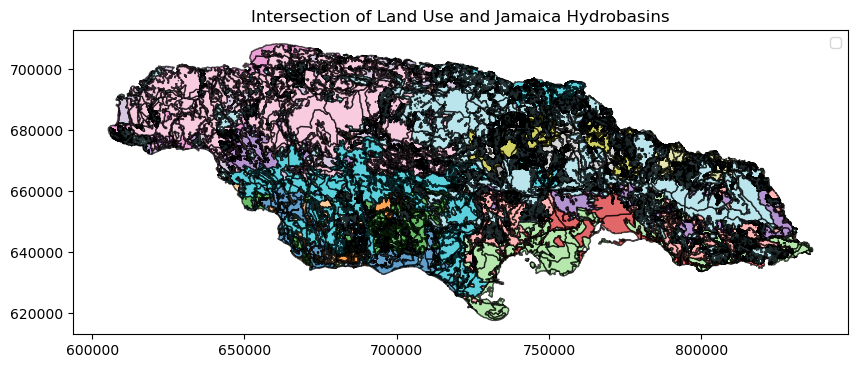

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
land_use_hydrobasins_intersection_saved.plot(ax=ax, cmap='tab20', edgecolor='black', alpha=0.7)
#land_use_hydrobasins_intersection_saved.boundary.plot(ax=ax, color='blue', linewidth=0.5, label='HydroBASINS')
plt.title("Intersection of Land Use and Jamaica Hydrobasins")
plt.legend()
plt.show()

In [28]:
# Count the unique values in the 'HYBAS_ID' column to check how many rows I have
unique_hybas_ids = land_use_hydrobasins_intersection_saved['HYBAS_ID'].nunique()

# Print the result
print(f"Number of unique HYBAS_ID values: {unique_hybas_ids}")

Number of unique HYBAS_ID values: 103


### Step 3: Calculate total area of each catchment and the percentage catchment coverage of each land use type

#### 3.1 Calculate total area of each catchment

In [29]:
# Calculate the area for each feature in the GeoDataFrame (in square units, based on CRS). 
# This calculates the area for each polygon feature in the GeoDataFrame. 
# The units of the area will depend on the CRS of the data (EPSG: 3448, which uses meters, so the area is in square meters).
land_use_hydrobasins_intersection_saved['area'] = land_use_hydrobasins_intersection_saved.geometry.area

# Total area of each catchmemt - group by 'HYBAS_ID' and sum the 'area' for each catchment
total_area_by_catchment = land_use_hydrobasins_intersection_saved.groupby('HYBAS_ID')['area'].sum().reset_index()
total_catchment_area  = total_area_by_catchment.rename(columns={'area': 'total_catchment_area'})

# Print the result to see the total area for each HYBAS_ID
print(total_catchment_area.head())

     HYBAS_ID  total_catchment_area
0  7120065130          9.140013e+07
1  7120065140          1.988735e+08
2  7120065150          7.775380e+07
3  7120065160          1.977290e+06
4  7120065170          1.666542e+08


#### 3.2 Calculate area of each land use within each catchment

In [30]:
# Area of land use within each catchmemt - group by 'HYBAS_ID' and 'classify' and sum the 'area' for each catchment
total_landuse_area_by_catchment = land_use_hydrobasins_intersection_saved.groupby(['HYBAS_ID', 'Classify'])['area'].sum().reset_index()

print(total_landuse_area_by_catchment.head())

# Define the output file path
output_landuse_areas_path = output_path / "total_landuse_area_by_catchment.csv"

# Export the DataFrame to a CSV file
total_landuse_area_by_catchment.to_csv(output_landuse_areas_path, index=False)

print(f"Data successfully exported to {output_landuse_areas_path}")

     HYBAS_ID                                           Classify          area
0  7120065130                        Bamboo and Secondary Forest  7.133374e+05
1  7120065130                Buildings and other infrastructures  9.801566e+06
2  7120065130    Disturbed broadleaved forest (Secondary Forest)  4.796440e+06
3  7120065130                        Fields and Secondary Forest  7.346578e+06
4  7120065130  Fields: Herbaceous crops, fallow, cultivated v...  4.992600e+05
Data successfully exported to /Users/robynhaggis/Documents/Geospatial_analysis/Processed_data/total_landuse_area_by_catchment.csv


#### 3.3 Calculate percentage catchment covered by each land use type

In [31]:
# Merge total area of catchments with the land use area to calculate percentage
land_use_with_total_area = total_landuse_area_by_catchment.merge(total_catchment_area, on='HYBAS_ID')

# Calculate the percentage of each land use area relative to the total catchment area
land_use_with_total_area['Percentage of Catchment'] = (land_use_with_total_area['area'] / land_use_with_total_area['total_catchment_area']) * 100

# Print the result to see the percentage of land use for each catchment
print(land_use_with_total_area.head())

# Define the output file path
output_percentage_landcover_csv_path = output_path / "land_use_percentage_by_catchment.csv"

# Export the DataFrame to a CSV file
land_use_with_total_area.to_csv(output_percentage_landcover_csv_path, index=False)

print(f"Data successfully exported to {output_percentage_landcover_csv_path}")


     HYBAS_ID                                           Classify  \
0  7120065130                        Bamboo and Secondary Forest   
1  7120065130                Buildings and other infrastructures   
2  7120065130    Disturbed broadleaved forest (Secondary Forest)   
3  7120065130                        Fields and Secondary Forest   
4  7120065130  Fields: Herbaceous crops, fallow, cultivated v...   

           area  total_catchment_area  Percentage of Catchment  
0  7.133374e+05          9.140013e+07                 0.780456  
1  9.801566e+06          9.140013e+07                10.723798  
2  4.796440e+06          9.140013e+07                 5.247739  
3  7.346578e+06          9.140013e+07                 8.037820  
4  4.992600e+05          9.140013e+07                 0.546236  
Data successfully exported to /Users/robynhaggis/Documents/Geospatial_analysis/Processed_data/land_use_percentage_by_catchment.csv


### Step 4: determine current forest coverage within each catchment and future afforestable area

#### 4.1 Determining current forest, non-afforestable and future afforestable land use categories

In [32]:
# Define fractional distribution for land use types including mixed land use

current_forested_lands = {
    'Open dry forest - Short',
    'Open dry forest - Tall (Woodland/Savanna)',
    'Disturbed broadleaved forest (Secondary Forest)',
    'Closed broadleaved forest (Primary Forest)',
    'Secondary Forest',
}

non_afforestable = {
    'Bare Rock',
    'Herbaceous Wetland',
    'Mangrove Forest',
    'Water Body',
    'Buildings and other infrastructures',
}


future_afforestable_non_agricultural_lands = {
    'Fields: Bare Land',
    'Quarry',
    'Bauxite Extraction',
    'Bamboo',
}

future_afforestable_agricultural_lands = {
    'Fields: Herbaceous crops, fallow, cultivated vegetables',
    'Fields: Pasture,Human disturbed, grassland',
}

mixed_land_use_fractions = {
    'Fields and Secondary Forest': {'future_afforestable_agricultural_lands': 0.75, 'current_forested_lands': 0.25},
    'Bamboo and Fields': {'future_afforestable_non_agricultural_lands': 0.75, 'future_afforestable_agricultural_lands': 0.25},
    'Fields  and Bamboo': {'future_afforestable_agricultural_lands': 0.75, 'future_afforestable_non_agricultural_lands': 0.25},
    'Bamboo and Secondary Forest': {'future_afforestable_non_agricultural_lands': 0.75, 'current_forested_lands': 0.25},
    'Fields or Secondary Forest/Pine Plantation': {'future_afforestable_agricultural_lands': 0.75, 'current_forested_lands': 0.25},
}

tree_plantations = {
    'Plantation: Tree crops, shrub crops, sugar cane, banana',
    'Hardwood Plantation: Euculytus',
    'Hardwood Plantation: Mixed' 'Swamp Forest',
    'Hardwood Plantation: Mahoe',
    'Hardwood Plantation: Mahogany', 
}

print(current_forested_lands)

{'Closed broadleaved forest (Primary Forest)', 'Open dry forest - Short', 'Secondary Forest', 'Disturbed broadleaved forest (Secondary Forest)', 'Open dry forest - Tall (Woodland/Savanna)'}


#### 4.2 Calculate the area of each land use category

In [33]:
# The "def calculate_fractional_areas" function calculates areas based on land use classifications. 
# If a land parcel has mixed uses, it allocates the area fractionally among the different uses. 
# If it’s a single-use land parcel, it assigns the full area to that specific use category.
# For "mixed_land_use" fractions:
## -- The code checks if the current land_use_type is a key in mixed_land_use_fractions. 
## -- It retrieves the corresponding fractional allocations.
## -- It returns a new dictionary where each sub-type is assigned its respective fractional area (area * frac).


def calculate_fractional_areas(row):
    """
    Calculate the fractional areas for mixed land use types or return the full area for single land use types.
    """
    land_use_type = row['Classify']  # Adjust column name if different
    area = row.geometry.area
    
    if land_use_type in mixed_land_use_fractions:
        fractions = mixed_land_use_fractions[land_use_type]
        return {lu: area * frac for lu, frac in fractions.items()}
    elif land_use_type in non_afforestable:
        return {'non_afforestable': area}
    elif land_use_type in future_afforestable_agricultural_lands:
        return {'future_afforestable_agricultural_lands': area}
    elif land_use_type in future_afforestable_non_agricultural_lands:
        return {'future_afforestable_non_agricultural_lands': area}
    elif land_use_type in current_forested_lands:
        return {'current_forested_lands': area}
    elif land_use_type in tree_plantations:
        return {'tree_plantations': area}
    else:
        return {'other': area}

In [34]:
# Step 2: Expand land use areas by fractional components
expanded_areas = []

for _, row in land_use_hydrobasins_intersection_saved.iterrows():
    fractional_areas = calculate_fractional_areas(row)
    for lu_type, lu_area in fractional_areas.items():
        expanded_areas.append({
            'HYBAS_ID': row['HYBAS_ID'],  # Replace with your catchment ID column
            'LandUseCategory': lu_type,
            'Area': lu_area,
            'geometry': row['geometry']  # Keep geometry for plotting
        })

# Convert to a GeoDataFrame
expanded_gdf = gpd.GeoDataFrame(expanded_areas, geometry='geometry')
print(expanded_gdf)

         HYBAS_ID         LandUseCategory          Area  \
0      7120065310        non_afforestable  1.024125e+02   
1      7120065310        non_afforestable  6.664692e+02   
2      7120065310        non_afforestable  9.335602e+02   
3      7120065320        non_afforestable  5.841233e+03   
4      7120065320        non_afforestable  7.586138e+05   
...           ...                     ...           ...   
16363  7120065610  current_forested_lands  2.518769e+05   
16364  7120065610  current_forested_lands  1.339839e+06   
16365  7120065610  current_forested_lands  6.099718e+05   
16366  7120849030  current_forested_lands  3.743553e+05   
16367  7120852680  current_forested_lands  3.871273e+06   

                                                geometry  
0      POLYGON ((695837.234 632593.591, 695828.883 63...  
1      POLYGON ((696323.914 632816.384, 696373.714 63...  
2      POLYGON ((694310.476 633240.981, 694327.859 63...  
3      POLYGON ((685805.631 634787.077, 685829.444 63..

In [35]:
expanded_gdf.head()

,HYBAS_ID,LandUseCategory,Area,geometry
0,7120065310,non_afforestable,102.412462,"POLYGON ((695837.234 632593.591, 695828.883 63..."
1,7120065310,non_afforestable,666.469234,"POLYGON ((696323.914 632816.384, 696373.714 63..."
2,7120065310,non_afforestable,933.560162,"POLYGON ((694310.476 633240.981, 694327.859 63..."
3,7120065320,non_afforestable,5841.232834,"POLYGON ((685805.631 634787.077, 685829.444 63..."
4,7120065320,non_afforestable,758613.757698,"POLYGON ((679869.565 635510.767, 679817.633 63..."


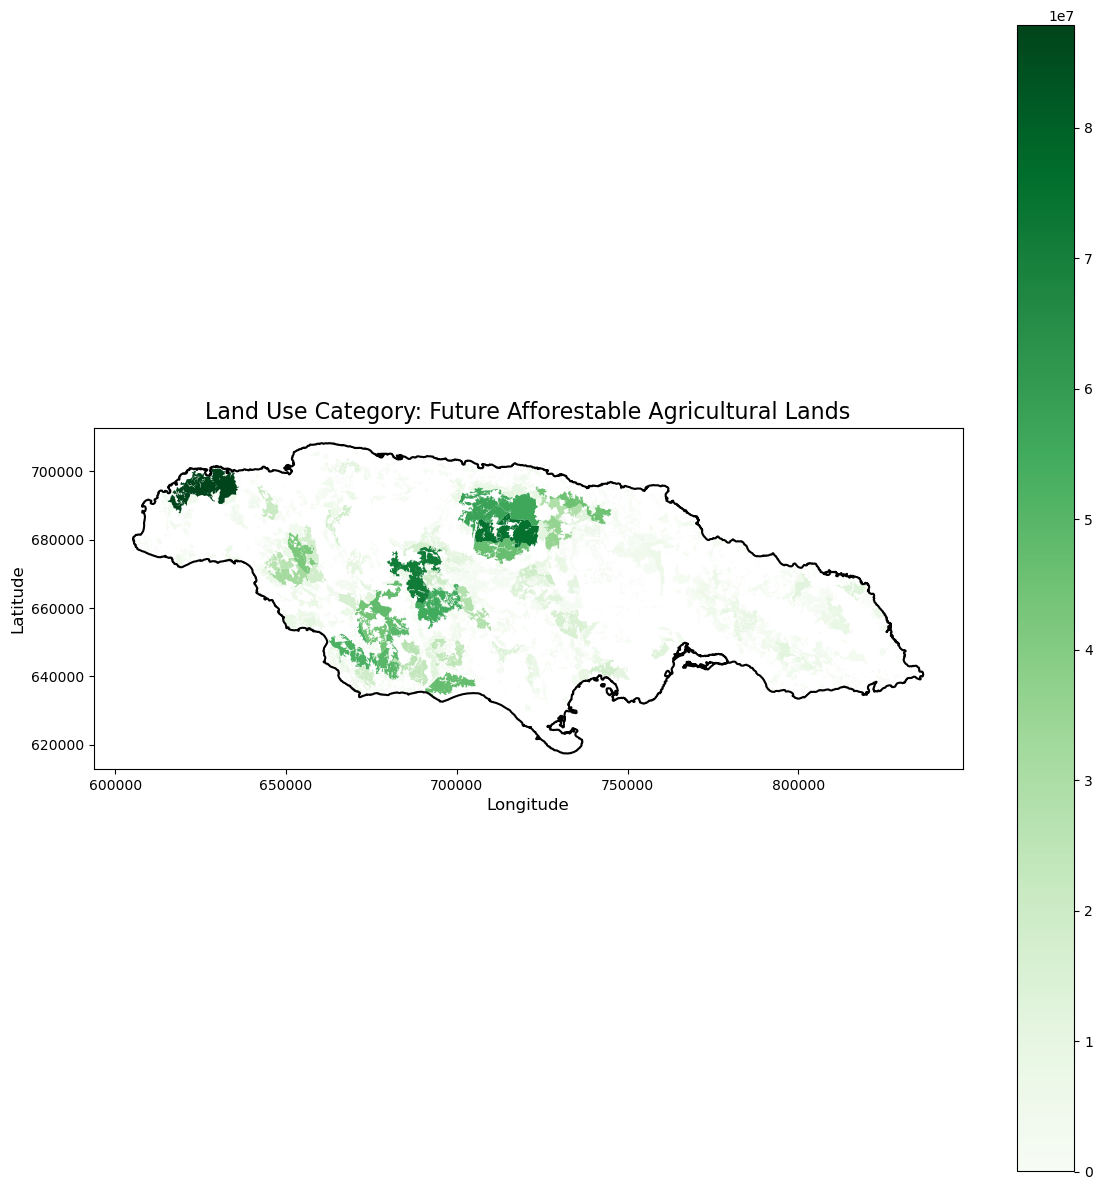

In [36]:
# Step 3: Function to plot a specific land use category
def plot_land_use_category(category_name):
    """
    Plot the areas corresponding to a specific land use category.
    """
    # Filter by category
    filtered_data = expanded_gdf[expanded_gdf['LandUseCategory'] == category_name]
    
    if filtered_data.empty:
        print(f"No data found for category '{category_name}'")
        return
    
    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    filtered_data.plot(
        column='Area',  # Optionally, color based on area
        cmap='Greens',  # Adjust colormap as needed
        legend=True,
        ax=ax
    )

    jamaica_boundary.boundary.plot(
        ax=ax, color='black', linewidth=1.5, label='Jamaica Boundary'
    )
    
    # Title and labels
    plt.title(f"Land Use Category: {category_name.replace('_', ' ').title()}", fontsize=16)
    plt.xlabel("Longitude", fontsize=12)
    plt.ylabel("Latitude", fontsize=12)
    
    # Adjust legend
    legend = ax.get_legend()
    if legend:
        legend.set_bbox_to_anchor((1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_land_use_category('future_afforestable_agricultural_lands')

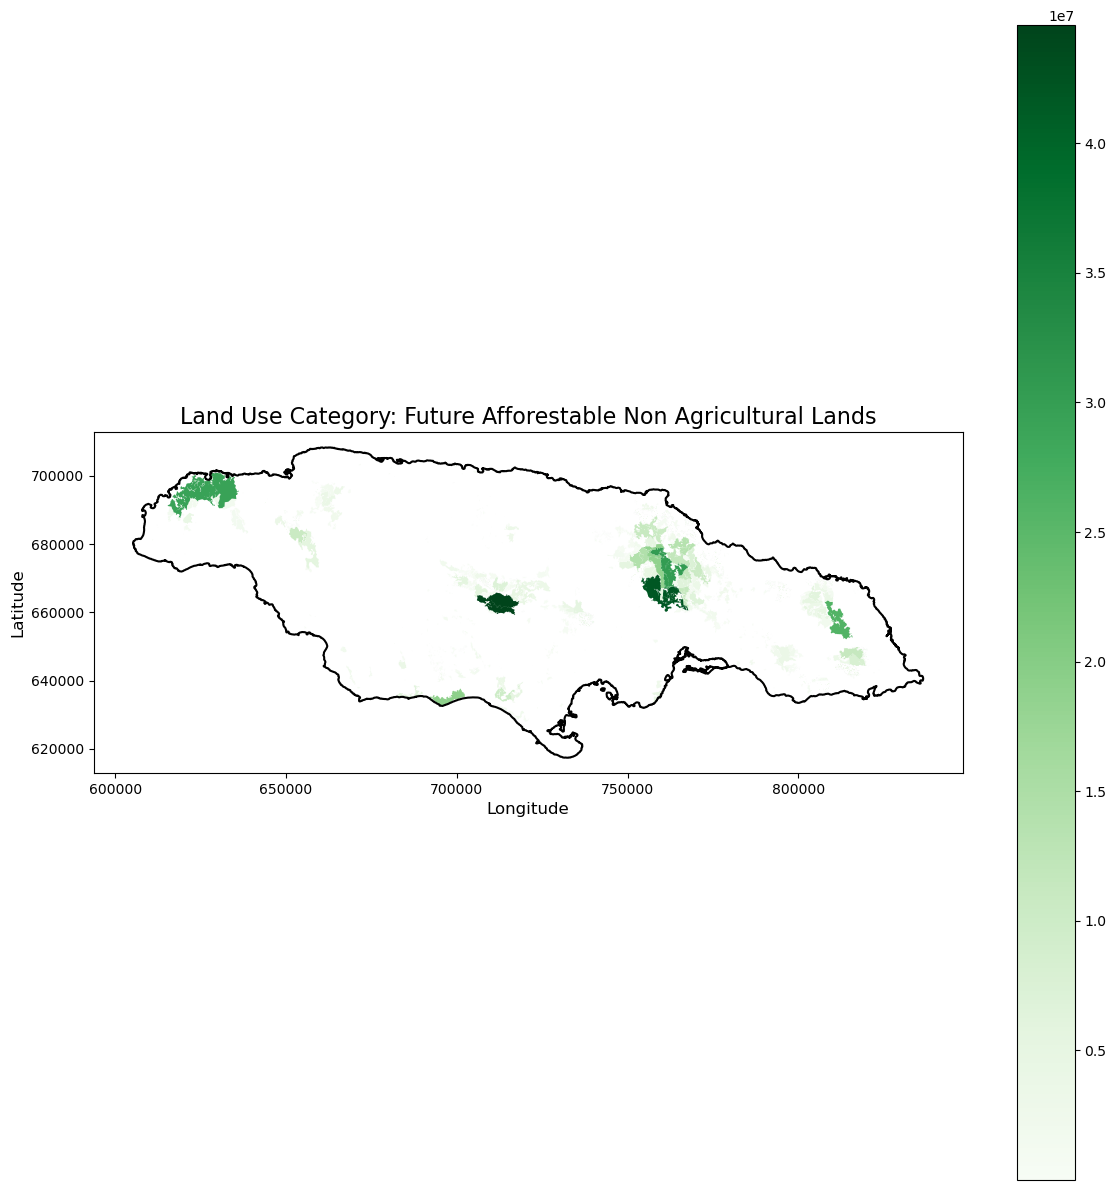

In [37]:
plot_land_use_category('future_afforestable_non_agricultural_lands')

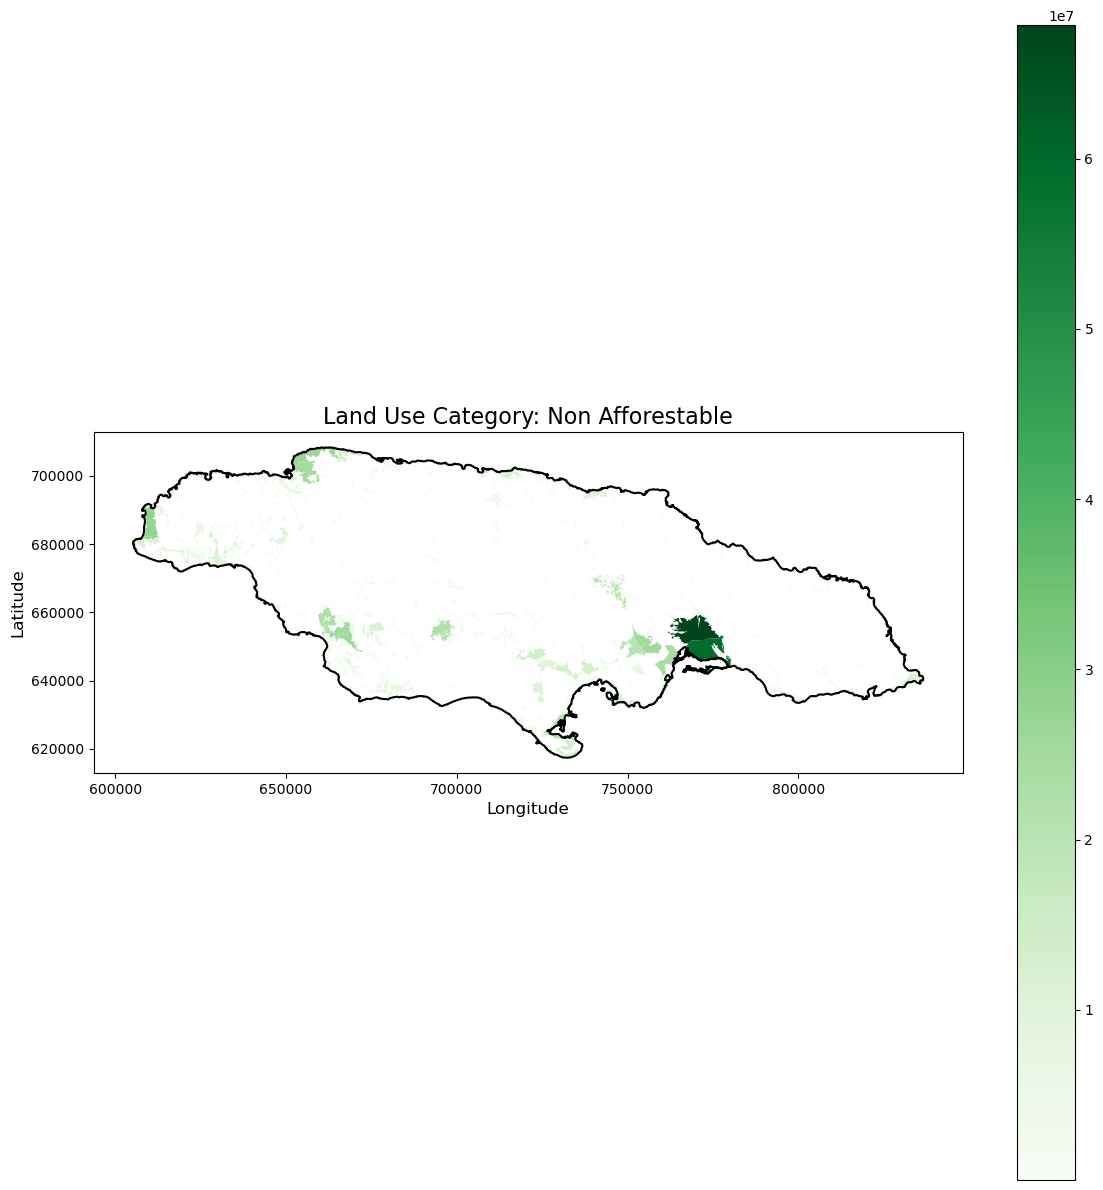

In [38]:
plot_land_use_category('non_afforestable')

In [39]:
# Assume 'expanded_gdf' is your GeoDataFrame from the previous steps
# It should have columns: 'HYBAS_ID', 'LandUseCategory', 'Area', 'geometry'

# Step 1: Aggregate Area by Catchment and Land Use Category
category_area = expanded_gdf.groupby(['HYBAS_ID', 'LandUseCategory'])['Area'].sum().reset_index()

# Step 2: Calculate Total Area per Catchment
total_area = expanded_gdf.groupby('HYBAS_ID')['Area'].sum().reset_index().rename(columns={'Area': 'TotalArea'})

# Step 3: Merge Aggregated Data with Total Area
category_percentage = pd.merge(category_area, total_area, on='HYBAS_ID')

# Step 4: Compute Percentage per Land Use Category
category_percentage['Percentage'] = (category_percentage['Area'] / category_percentage['TotalArea']) * 100

# (Optional) Step 5: Pivot Data for Easier Interpretation
percentage_pivot = category_percentage.pivot(index='HYBAS_ID', columns='LandUseCategory', values='Percentage').fillna(0).reset_index()

# Display the percentage DataFrame
print("Percentage of Each Land Use Category within Each Catchment:")
print(percentage_pivot.head())

# (Optional) Step 6: Merge Percentages Back with Geometry for Spatial Analysis or Mapping
# If you need to visualize or further analyze, you might want to have the geometry associated with each HYBAS_ID
# Assuming you have a GeoDataFrame 'hydrobasins_gdf' with 'HYBAS_ID' and 'geometry'

# Example:
# hydrobasins_gdf = gpd.read_file('path_to_hydrobasins.shp')
# percentage_with_geometry = pd.merge(percentage_pivot, hydrobasins_gdf[['HYBAS_ID', 'geometry']], on='HYBAS_ID')
# percentage_gdf = gpd.GeoDataFrame(percentage_with_geometry, geometry='geometry')

# # Now you can plot or analyze 'percentage_gdf' as needed

Percentage of Each Land Use Category within Each Catchment:
LandUseCategory    HYBAS_ID  current_forested_lands  \
0                7120065130               65.145420   
1                7120065140               54.584689   
2                7120065150               62.432633   
3                7120065160                2.561979   
4                7120065170               47.984825   

LandUseCategory  future_afforestable_agricultural_lands  \
0                                              6.574601   
1                                             33.054477   
2                                             15.645860   
3                                              7.685937   
4                                             41.224738   

LandUseCategory  future_afforestable_non_agricultural_lands  non_afforestable  \
0                                                  0.597752         14.481926   
1                                                  5.700432          5.931938   
2          

In [43]:
# Display the first few rows to verify
display(percentage_pivot.head())

LandUseCategory,HYBAS_ID,current_forested_lands,future_afforestable_agricultural_lands,future_afforestable_non_agricultural_lands,non_afforestable,other,tree_plantations
0,7120065130,65.145420,6.574601,0.597752,14.481926,0.000000,13.200301
1,7120065140,54.584689,33.054477,5.700432,5.931938,0.000000,0.728464
2,7120065150,62.432633,15.645860,2.525354,14.929164,0.000000,4.466988
3,7120065160,2.561979,7.685937,0.000000,89.752085,0.000000,0.000000
4,7120065170,47.984825,41.224738,3.028564,6.865503,0.283798,0.612572


In [44]:
# Define the file path and name

output_hydrobasins_percentage_afforestable_csv_path = output_path / "afforestable_percentages_by_catchment.csv"

In [45]:
# Export the DataFrame to CSV
percentage_pivot.to_csv(output_hydrobasins_percentage_afforestable_csv_path, index=False)

In [47]:
# 1. Pivot the area data by HYBAS_ID and LandUseCategory
area_pivot = category_percentage.pivot(
    index='HYBAS_ID',
    columns='LandUseCategory',
    values='Area'
).fillna(0).reset_index()

# 2. Merge the area data into percentage_pivot
percentage_pivot = pd.merge(percentage_pivot, area_pivot, on='HYBAS_ID', suffixes=('_pct', '_area'))

# 3. Add the total area for each hydrobasin
percentage_pivot['TotalArea'] = percentage_pivot.iloc[:, len(percentage_pivot.columns)-len(area_pivot.columns)+1:].sum(axis=1)

# Display the updated DataFrame
print(percentage_pivot.head())

output_hydrobasins_percentage_afforestable_with_catchment_area_csv_path = output_path / "afforestable_percentages_by_catchment_including_area.csv"

percentage_pivot.to_csv(output_hydrobasins_percentage_afforestable_with_catchment_area_csv_path , index=False)

LandUseCategory    HYBAS_ID  current_forested_lands_pct  \
0                7120065130                   65.145420   
1                7120065140                   54.584689   
2                7120065150                   62.432633   
3                7120065160                    2.561979   
4                7120065170                   47.984825   

LandUseCategory  future_afforestable_agricultural_lands_pct  \
0                                                  6.574601   
1                                                 33.054477   
2                                                 15.645860   
3                                                  7.685937   
4                                                 41.224738   

LandUseCategory  future_afforestable_non_agricultural_lands_pct  \
0                                                      0.597752   
1                                                      5.700432   
2                                                      2.525354  

In [50]:
# Add a new column for TotalArea in km² by dividing by 1,000,000
percentage_pivot['TotalArea_km2'] = percentage_pivot['TotalArea'] / 1_000_000

# Display the updated DataFrame to check the new column
display(percentage_pivot.head())

total_afforestable_area_by_catchment_csv_path = output_path / "total_afforestable_area_by_catchment.csv"

percentage_pivot.to_csv(total_afforestable_area_by_catchment_csv_path , index=False)

LandUseCategory,HYBAS_ID,current_forested_lands_pct,future_afforestable_agricultural_lands_pct,future_afforestable_non_agricultural_lands_pct,non_afforestable_pct,other_pct,tree_plantations_pct,current_forested_lands_area,future_afforestable_agricultural_lands_area,future_afforestable_non_agricultural_lands_area,...,other_area,tree_plantations_area,TotalArea,current_forested_lands,future_afforestable_agricultural_lands,future_afforestable_non_agricultural_lands,non_afforestable,other,tree_plantations,TotalArea_km2
0,7120065130,65.145420,6.574601,0.597752,14.481926,0.000000,13.200301,5.954300e+07,6.009194e+06,5.463464e+05,...,0.000000,1.206509e+07,9.140013e+07,5.954300e+07,6.009194e+06,5.463464e+05,1.323650e+07,0.000000,1.206509e+07,91.400134
1,7120065140,54.584689,33.054477,5.700432,5.931938,0.000000,0.728464,1.085545e+08,6.573660e+07,1.133665e+07,...,0.000000,1.448723e+06,1.988735e+08,1.085545e+08,6.573660e+07,1.133665e+07,1.179705e+07,0.000000,1.448723e+06,198.873517
2,7120065150,62.432633,15.645860,2.525354,14.929164,0.000000,4.466988,4.854374e+07,1.216525e+07,1.963559e+06,...,0.000000,3.473253e+06,7.775380e+07,4.854374e+07,1.216525e+07,1.963559e+06,1.160799e+07,0.000000,3.473253e+06,77.753800
3,7120065160,2.561979,7.685937,0.000000,89.752085,0.000000,0.000000,5.065774e+04,1.519732e+05,0.000000e+00,...,0.000000,0.000000e+00,1.977290e+06,5.065774e+04,1.519732e+05,0.000000e+00,1.774659e+06,0.000000,0.000000e+00,1.977290
4,7120065170,47.984825,41.224738,3.028564,6.865503,0.283798,0.612572,7.996872e+07,6.870275e+07,5.047229e+06,...,472960.433033,1.020877e+06,1.666542e+08,7.996872e+07,6.870275e+07,5.047229e+06,1.144165e+07,472960.433033,1.020877e+06,166.654179
